In [1]:
import numpy as np
from qiskit import *

In [2]:
circ = QuantumCircuit(2)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
circ.measure_all()

In [3]:
circ.draw() 

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

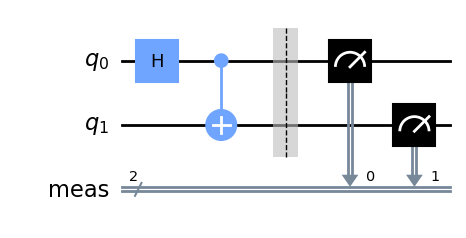

In [4]:
circ.draw("mpl")

In [11]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = backend.run(circ)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)

print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


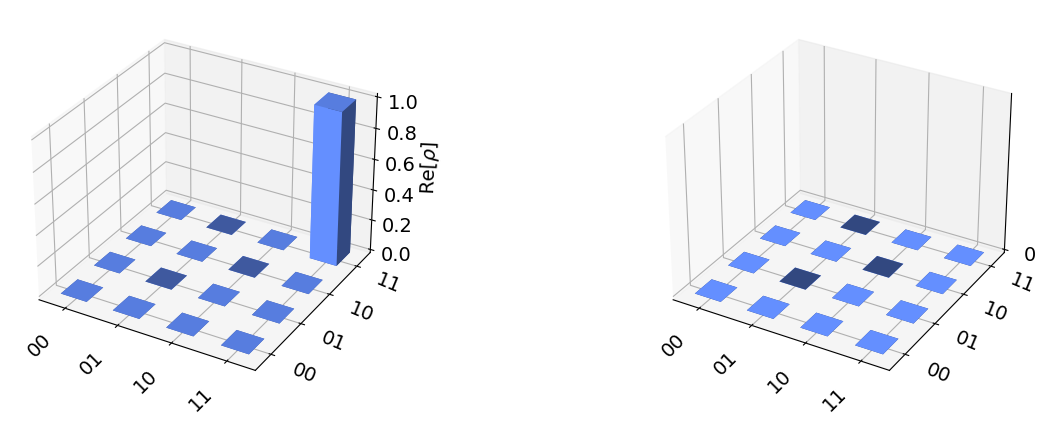

In [12]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [9]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circ, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(circ)
print(counts)

{'11': 499, '00': 525}


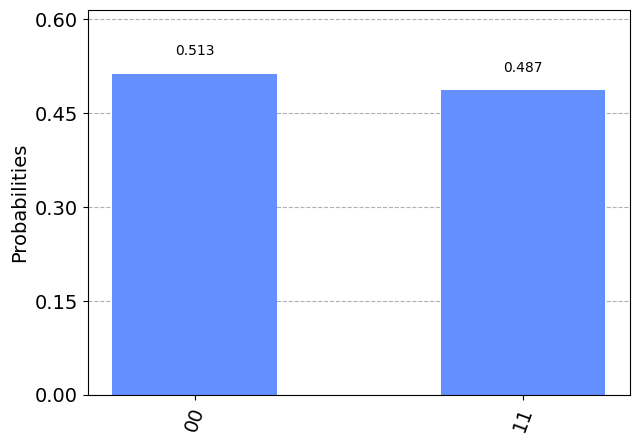

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [16]:
from qiskit import IBMQ

#IBMQ.save_account("Token")
provider = IBMQ.load_account() # Load account from disk

[(b.name() , b.configuration().n_qubits) for b in provider.backends()]

ibmqfactory.load_account:WARNING:2022-09-29 06:15:58,012: Credentials are already in use. The existing account in the session will be replaced.


[('ibmq_qasm_simulator', 32),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibmq_manila', 5),
 ('ibm_nairobi', 7),
 ('ibm_oslo', 7)]

In [19]:
from qiskit.tools.jupyter import * 
%qiskit_backend_overview

In [29]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(
    simulator=False, 
    filters=lambda b : b.configuration().n_qubits >= 2))

backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
# Following circ cannot executed by backend => Error code: 1106.
# "Unable to retrieve result for job 63353c2a493478c7c1ff44aa. Job has failed: 
# The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). "

job = backend.run(circ)
result = job.result()

IBMQJobFailureError: "Unable to retrieve result for job 6335558d84079a1f466f59b7. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

In [32]:
from qiskit import transpile
transpiled_circ = transpile(circ,backend)
transpiled_circ.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

In [33]:
job = backend.run(transpiled_circ)

In [36]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [37]:
result = job.result()

{'00': 1939, '01': 129, '10': 81, '11': 1851}


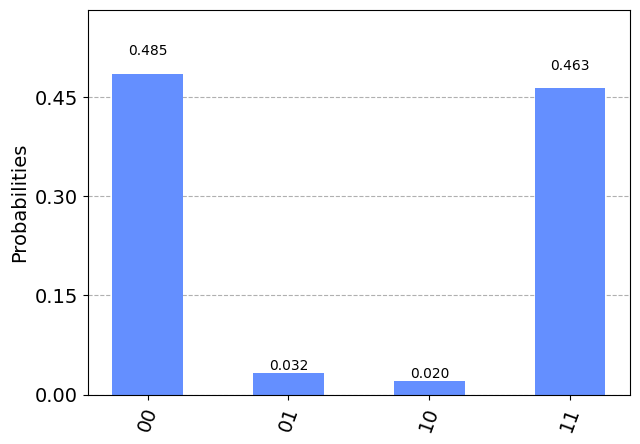

In [38]:
counts = result.get_counts(transpiled_circ)
print(counts)
plot_histogram(counts)